# Problem Statement:
Predict whether it will rain tomorrow or not using the following features:
  
  'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'. 

In [ ]:
#importing basic libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [ ]:
#reading the dataset
df = pd.read_csv('Weather Training Data.csv')
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [ ]:
#checking the shape
df.shape

(99516, 23)

In [ ]:
#checking cols and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [ ]:
#checking for duplicates:
df.duplicated().sum()

0

In [ ]:
#counting unique values
df.nunique()

row ID           99516
Location            49
MinTemp            386
MaxTemp            500
Rainfall           601
Evaporation        327
Sunshine           145
WindGustDir         16
WindGustSpeed       67
WindDir9am          16
WindDir3pm          16
WindSpeed9am        43
WindSpeed3pm        44
Humidity9am        101
Humidity3pm        101
Pressure9am        536
Pressure3pm        536
Cloud9am            10
Cloud3pm            10
Temp9am            432
Temp3pm            491
RainToday            2
RainTomorrow         2
dtype: int64

In [ ]:
#checking for null values:
df.isnull().sum()

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [ ]:
df.columns

Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
#keeping required cols:
new_df = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']]

In [ ]:
new_df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0
2,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0
3,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,0
4,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,0


# Analysing each column:

In [ ]:
new_df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
new_df['WindGustDir'].value_counts()

W      6843
SE     6475
E      6341
SSE    6329
N      6323
SW     6233
S      6228
WSW    6164
SSW    6023
WNW    5664
NW     5599
ENE    5558
ESE    5101
NE     4956
NNW    4589
NNE    4569
Name: WindGustDir, dtype: int64

In [ ]:
new_df['WindDir9am'].value_counts()

N      8052
E      6333
SE     6311
SSE    6214
S      5995
NW     5975
SW     5808
W      5790
NNE    5600
NNW    5457
ENE    5357
NE     5323
ESE    5312
SSW    5147
WNW    5041
WSW    4795
Name: WindDir9am, dtype: int64

In [ ]:
new_df['WindDir3pm'].value_counts()

SE     7410
W      6897
S      6653
WSW    6640
SW     6451
SSE    6386
N      6065
WNW    6063
NW     5917
ESE    5850
E      5839
NE     5710
SSW    5576
NNW    5437
ENE    5413
NNE    4561
Name: WindDir3pm, dtype: int64

In [ ]:
new_df['RainToday'].value_counts()

No     76481
Yes    22056
Name: RainToday, dtype: int64

In [ ]:
new_df['RainTomorrow'].value_counts()

0    77157
1    22359
Name: RainTomorrow, dtype: int64

In [ ]:
#the data is imbalanced so we will use sampling:
trf_df = new_df.copy() #creating a copy
trf_df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0
2,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0
3,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,0
4,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,0


In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class for RainTomorrow column:
df_majority = trf_df[(trf_df['RainTomorrow']==0)] 
df_minority = trf_df[(trf_df['RainTomorrow']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 77157, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
df_upsampled.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
68476,MountGambier,10.6,18.4,3.6,WNW,54.0,NNW,W,17.0,24.0,94.0,62.0,1001.3,1002.5,14.2,15.9,Yes,1
4321,Cobar,12.2,17.4,0.0,NW,43.0,N,NW,13.0,11.0,61.0,90.0,1012.0,1010.2,16.5,14.8,No,1
23977,SydneyAirport,16.4,17.9,1.2,SSW,52.0,SSW,SSE,19.0,17.0,91.0,85.0,1012.7,1011.1,16.4,17.0,Yes,1
95503,Darwin,25.7,32.4,0.0,ENE,37.0,NNE,NW,19.0,17.0,77.0,56.0,1013.3,1010.2,28.1,31.3,No,1
53272,Watsonia,7.8,15.6,1.6,N,31.0,NaN,N,0.0,13.0,99.0,87.0,1009.3,1008.3,9.0,11.5,Yes,1


In [ ]:
df_upsampled['RainTomorrow'].value_counts()

1    77157
0    77157
Name: RainTomorrow, dtype: int64

In [ ]:
df_upsampled.shape

(154314, 18)

In [ ]:
df_upsampled['RainToday'].value_counts()

No     105053
Yes     47093
Name: RainToday, dtype: int64

In [ ]:
df_upsampled['RainToday'].fillna('Yes',inplace=True)
df_upsampled['RainToday'].value_counts()

No     105053
Yes     49261
Name: RainToday, dtype: int64

In [ ]:
df_upsampled.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
count,153555.000000,153962.000000,152146.000000,143658.000000,152736.000000,151250.000000,152208.000000,150193.000000,139215.000000,139200.000000,153189.000000,151130.000000,154314.000000
mean,12.547759,22.471157,3.670428,42.103433,14.521580,19.147094,72.088451,57.565133,1016.510146,1014.223438,16.865569,20.799033,0.500000
std,6.367051,7.110718,10.945362,14.666469,9.159153,9.182014,18.589353,21.812719,7.353620,7.287160,6.446914,6.930442,0.500002
min,-8.500000,-4.100000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,-7.000000,-5.100000,0.000000
10%,4.500000,14.000000,0.000000,26.000000,4.000000,9.000000,47.000000,27.000000,1007.300000,1005.200000,9.000000,12.500000,0.000000
25%,8.000000,17.200000,0.000000,31.000000,7.000000,13.000000,60.000000,42.000000,1011.700000,1009.300000,12.200000,15.700000,0.000000
50%,12.300000,21.700000,0.000000,41.000000,13.000000,19.000000,74.000000,58.000000,1016.500000,1014.200000,16.500000,20.100000,0.500000
75%,17.200000,27.400000,2.200000,50.000000,20.000000,24.000000,87.000000,73.000000,1021.400000,1019.200000,21.400000,25.500000,1.000000
90%,21.200000,32.300000,10.400000,61.000000,26.000000,31.000000,96.000000,87.000000,1025.800000,1023.600000,25.800000,30.400000,1.000000
95%,23.500000,34.700000,19.000000,70.000000,31.000000,35.000000,99.000000,93.000000,1028.600000,1026.300000,28.100000,32.900000,1.000000


<Axes: >

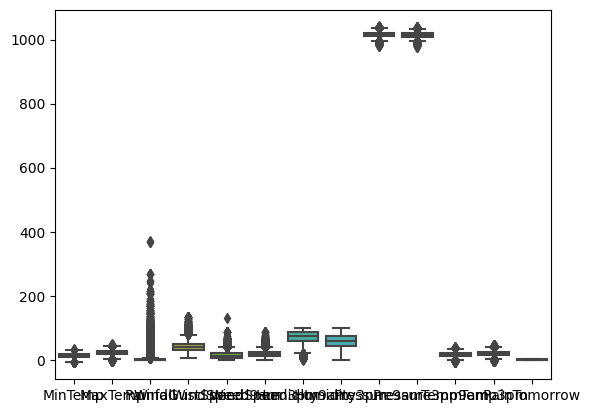

In [ ]:
sns.boxplot(df_upsampled)

In [ ]:
X = df_upsampled.iloc[:,:-1]
y = df_upsampled.iloc[:,-1]

In [ ]:
# Removing outliers using IQR:
def outlier_removal(df):
  cols_list = df.select_dtypes(include='number').columns.to_list()
  for i in cols_list:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    iqr = Q3 - Q1
    upp = Q3 + 1.5*iqr
    low = Q1 - 1.5*iqr
    df[i] = np.where(df[i]>upp,upp,(np.where(df[i]<low,low,df[i])))
  return df

In [ ]:
#applying the function:
X = outlier_removal(X)
X.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
68476,MountGambier,10.6,18.4,3.6,WNW,54.0,NNW,W,17.0,24.0,94.0,62.0,1001.3,1002.5,14.2,15.9,Yes
4321,Cobar,12.2,17.4,0.0,NW,43.0,N,NW,13.0,11.0,61.0,90.0,1012.0,1010.2,16.5,14.8,No
23977,SydneyAirport,16.4,17.9,1.2,SSW,52.0,SSW,SSE,19.0,17.0,91.0,85.0,1012.7,1011.1,16.4,17.0,Yes
95503,Darwin,25.7,32.4,0.0,ENE,37.0,NNE,NW,19.0,17.0,77.0,56.0,1013.3,1010.2,28.1,31.3,No
53272,Watsonia,7.8,15.6,1.6,N,31.0,NaN,N,0.0,13.0,99.0,87.0,1009.3,1008.3,9.0,11.5,Yes


In [ ]:
X.shape

(154314, 17)

<Axes: >

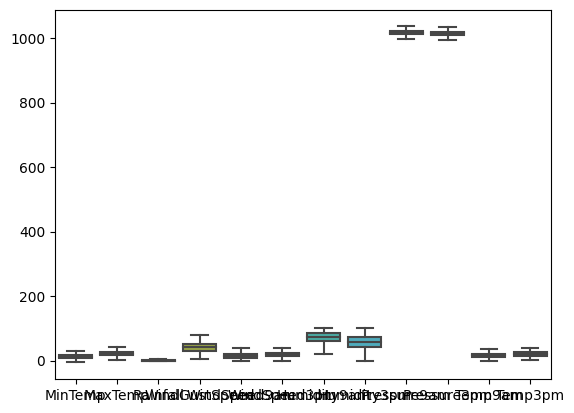

In [ ]:
sns.boxplot(X)

In [ ]:
X.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,153555.000000,153962.000000,152146.000000,143658.000000,152736.000000,151250.000000,152208.000000,150193.000000,139215.000000,139200.000000,153189.000000,151130.000000
mean,12.548122,22.475029,1.380444,41.923349,14.442410,19.023772,72.136721,57.565133,1016.534474,1014.241095,16.867244,20.800686
std,6.365782,7.085594,2.121173,14.096698,8.879457,8.809409,18.441502,21.812719,7.256829,7.215081,6.437553,6.898210
min,-5.800000,1.900000,0.000000,6.000000,0.000000,0.000000,19.500000,0.000000,997.150000,994.450000,-1.600000,1.000000
25%,8.000000,17.200000,0.000000,31.000000,7.000000,13.000000,60.000000,42.000000,1011.700000,1009.300000,12.200000,15.700000
50%,12.300000,21.700000,0.000000,41.000000,13.000000,19.000000,74.000000,58.000000,1016.500000,1014.200000,16.500000,20.100000
75%,17.200000,27.400000,2.200000,50.000000,20.000000,24.000000,87.000000,73.000000,1021.400000,1019.200000,21.400000,25.500000
max,31.000000,42.700000,5.500000,78.500000,39.500000,40.500000,100.000000,100.000000,1035.950000,1034.050000,35.200000,40.200000


In [ ]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
68476,MountGambier,10.6,18.4,3.6,WNW,54.0,NNW,W,17.0,24.0,94.0,62.0,1001.3,1002.5,14.2,15.9,Yes
4321,Cobar,12.2,17.4,0.0,NW,43.0,N,NW,13.0,11.0,61.0,90.0,1012.0,1010.2,16.5,14.8,No
23977,SydneyAirport,16.4,17.9,1.2,SSW,52.0,SSW,SSE,19.0,17.0,91.0,85.0,1012.7,1011.1,16.4,17.0,Yes
95503,Darwin,25.7,32.4,0.0,ENE,37.0,NNE,NW,19.0,17.0,77.0,56.0,1013.3,1010.2,28.1,31.3,No
53272,Watsonia,7.8,15.6,1.6,N,31.0,NaN,N,0.0,13.0,99.0,87.0,1009.3,1008.3,9.0,11.5,Yes


In [ ]:
y.head()

68476    1
4321     1
23977    1
95503    1
53272    1
Name: RainTomorrow, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder

In [ ]:
X_train.select_dtypes(include='number').columns.to_list()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
#imputing mode for categorical columns:
si = SimpleImputer(strategy='most_frequent')
cat_cols = X_train.select_dtypes(exclude='number').columns.to_list()
for i in cat_cols:
  X_train[i] = si.fit_transform(X_train[i].values.reshape(-1,1))
  X_test[i] = si.transform(X_test[i].values.reshape(-1,1))

In [ ]:
#imputing mean for numerical cols:
si2 = SimpleImputer(strategy='mean')
num_cols = X_train.select_dtypes(include='number').columns.to_list()
for i in num_cols:
  X_train[i] = si2.fit_transform(X_train[i].values.reshape(-1,1))
  X_test[i] = si2.transform(X_test[i].values.reshape(-1,1))

In [ ]:
#label encoding the columns:
le = LabelEncoder()
cat_cols = X_train.select_dtypes(exclude='number').columns.to_list()
for i in cat_cols:
  X_train[i] = le.fit_transform(X_train[i].values.reshape(-1,1))
  X_test[i] = le.transform(X_test[i].values.reshape(-1,1))


In [ ]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
34284,40,12.6,25.7,0.0,13,31.0,1,13,7.0,19.0,85.0,84.0,1012.200000,1008.900000,18.2,19.8,0
92568,17,3.4,13.0,5.5,6,33.0,6,6,9.0,19.0,79.0,64.0,1016.531537,1014.237936,7.7,12.9,1
94201,3,9.8,32.2,0.0,1,33.0,7,2,6.0,11.0,24.0,7.0,1023.100000,1018.400000,22.0,31.0,0
14626,27,11.3,18.4,0.0,15,19.0,1,15,2.0,11.0,70.0,61.0,1022.000000,1019.600000,17.5,18.0,0
1079,2,11.4,28.2,0.0,5,28.0,0,3,7.0,2.0,74.0,33.0,1025.200000,1021.000000,18.0,27.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55134,44,12.5,36.3,0.0,5,41.0,0,6,6.0,19.0,80.0,13.0,1012.100000,1007.600000,18.0,34.5,0
34127,40,-0.1,14.6,0.0,0,22.0,3,0,0.0,15.0,92.0,53.0,1035.950000,1034.050000,4.8,12.9,0
71298,28,17.9,40.6,0.0,9,69.0,3,15,15.0,19.0,19.5,16.0,1010.500000,1008.300000,35.1,37.6,0
90431,15,13.8,18.6,0.0,8,22.0,1,12,6.0,7.0,82.0,81.0,1019.800000,1018.800000,15.5,16.9,0


LOGISTIC REGRESSION

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.76690535592781

In [ ]:
pos_prob = lr.predict_proba(X_test)[:,1]
pos_prob

array([0.32173932, 0.95535525, 0.80852039, ..., 0.78187166, 0.79240687,
       0.82847724])

In [ ]:
#creating a df for comparision of diff probabilities:
prob_df = pd.DataFrame({'Y_pred':y_pred,'Y_pred_probab':pos_prob})
prob_df

,Y_pred,Y_pred_probab
0,0,0.321739
1,1,0.955355
2,1,0.808520
3,1,0.954992
4,1,0.234994
...,...,...
30858,1,0.861780
30859,1,0.752626
30860,1,0.781872
30861,0,0.792407


In [ ]:
#Now one by one we will be checking for different threshold value

prob_df['Y_pred_0.1']=np.where((prob_df['Y_pred_probab']>0.1), 1,0) #here threshold value is 0.1
prob_df['Y_pred_0.2']=np.where(prob_df['Y_pred_probab']>0.2,1,0) #here threshold value is 0.2
prob_df['Y_pred_0.3']=np.where(prob_df['Y_pred_probab']>0.3, 1,0) #here threshold value is 0.3
prob_df['Y_pred_0.4']=np.where(prob_df['Y_pred_probab']>0.4, 1,0) #here threshold value is 0.4
prob_df['Y_pred_0.5']=np.where(prob_df['Y_pred_probab']>0.5, 1,0) #here threshold value is 0.5
prob_df['Y_pred_0.6']=np.where(prob_df['Y_pred_probab']>0.6, 1,0) #here threshold value is 0.6
prob_df['Y_pred_0.7']=np.where(prob_df['Y_pred_probab']>0.7, 1,0) #here threshold value is 0.7
prob_df['Y_pred_0.8']=np.where(prob_df['Y_pred_probab']>0.8, 1,0) #here threshold value is 0.8
prob_df['Y_pred_0.9']=np.where(prob_df['Y_pred_probab']>0.9, 1,0) #here threshold value is 0.9

In [ ]:
prob_df

,Y_pred,Y_pred_probab,Y_pred_0.1,Y_pred_0.2,Y_pred_0.3,Y_pred_0.4,Y_pred_0.5,Y_pred_0.6,Y_pred_0.7,Y_pred_0.8,Y_pred_0.9
0,0,0.321739,1,1,1,0,0,0,0,0,0
1,1,0.955355,1,1,1,1,1,1,1,1,1
2,1,0.808520,1,1,1,1,1,1,1,1,0
3,1,0.954992,1,1,1,1,1,1,1,1,1
4,1,0.234994,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
30858,1,0.861780,1,1,1,1,1,1,1,1,0
30859,1,0.752626,1,1,1,1,1,1,1,0,0
30860,1,0.781872,1,1,1,1,1,1,1,0,0
30861,0,0.792407,1,1,1,1,1,1,1,0,0


In [ ]:
#Let us find confusion matrix for all columns
from sklearn.metrics import confusion_matrix

c1=confusion_matrix(prob_df.loc[:,'Y_pred'],prob_df.loc[:,'Y_pred_0.1'])
c2=confusion_matrix(prob_df.loc[:,'Y_pred'],prob_df.loc[:,'Y_pred_0.2'])
c3=confusion_matrix(prob_df.loc[:,'Y_pred'],prob_df.loc[:,'Y_pred_0.3'])
c4=confusion_matrix(prob_df.loc[:,'Y_pred'],prob_df.loc[:,'Y_pred_0.4'])
c5=confusion_matrix(prob_df.loc[:,'Y_pred'],prob_df.loc[:,'Y_pred_0.5'])
c6=confusion_matrix(prob_df.loc[:,'Y_pred'],prob_df.loc[:,'Y_pred_0.6'])
c7=confusion_matrix(prob_df.loc[:,'Y_pred'],prob_df.loc[:,'Y_pred_0.7'])
c8=confusion_matrix(prob_df.loc[:,'Y_pred'],prob_df.loc[:,'Y_pred_0.8'])
c9=confusion_matrix(prob_df.loc[:,'Y_pred'],prob_df.loc[:,'Y_pred_0.9'])

In [ ]:
c1

array([[ 2929, 11665],
       [  169, 16100]])

In [ ]:
#Sensitivity for all thresholds
sen1=c1[0,0]/(c1[0,0]+c1[0,1])
sen2=c2[0,0]/(c2[0,0]+c2[0,1])
sen3=c3[0,0]/(c3[0,0]+c3[0,1])
sen4=c4[0,0]/(c4[0,0]+c4[0,1])
sen5=c5[0,0]/(c5[0,0]+c5[0,1])
sen6=c6[0,0]/(c6[0,0]+c6[0,1])
sen7=c7[0,0]/(c7[0,0]+c7[0,1])
sen8=c8[0,0]/(c8[0,0]+c8[0,1])
sen9=c9[0,0]/(c9[0,0]+c9[0,1])

In [ ]:
#Specificity of all thresholds
sep1=c1[1,1]/(c1[1,1]+c1[1,0])
sep2=c2[1,1]/(c2[1,1]+c2[1,0])
sep3=c3[1,1]/(c3[1,1]+c3[1,0])
sep4=c4[1,1]/(c4[1,1]+c4[1,0])
sep5=c5[1,1]/(c5[1,1]+c5[1,0])
sep6=c6[1,1]/(c6[1,1]+c6[1,0])
sep7=c7[1,1]/(c7[1,1]+c7[1,0])
sep8=c8[1,1]/(c8[1,1]+c8[1,0])
sep9=c9[1,1]/(c9[1,1]+c9[1,0])

In [ ]:
d_cutoff_value=pd.DataFrame(columns=['cutoff','Sensitivity','Specificity'])
d_cutoff_value

,cutoff,Sensitivity,Specificity


In [ ]:
d_cutoff_value=d_cutoff_value.append({'cutoff':0.1, 'Sensitivity': sen1,'Specificity':sep1}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.2, 'Sensitivity': sen2,'Specificity':sep2}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.3, 'Sensitivity': sen3,'Specificity':sep3}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.4, 'Sensitivity': sen4,'Specificity':sep4}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.5, 'Sensitivity': sen5,'Specificity':sep5}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.6, 'Sensitivity': sen6,'Specificity':sep6}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.7, 'Sensitivity': sen7,'Specificity':sep7}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.8, 'Sensitivity': sen8,'Specificity':sep8}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.9, 'Sensitivity': sen9,'Specificity':sep9}, ignore_index=True)
d_cutoff_value

,cutoff,Sensitivity,Specificity
0,0.1,0.200699,0.989612
1,0.2,0.437509,0.957588
2,0.3,0.606345,0.904850
3,0.4,0.736467,0.844920
4,0.5,0.837604,0.771897
5,0.6,0.911196,0.684123
6,0.7,0.959641,0.574221
7,0.8,0.985816,0.433462
8,0.9,0.997465,0.249985


In [ ]:
for i in range(9):
    d_cutoff_value.loc[i,'Total_val']=d_cutoff_value.loc[i,'Sensitivity']+d_cutoff_value.loc[i,'Specificity']

In [ ]:
d_cutoff_value

,cutoff,Sensitivity,Specificity,Total_val
0,0.1,0.200699,0.989612,1.190311
1,0.2,0.437509,0.957588,1.395097
2,0.3,0.606345,0.904850,1.511195
3,0.4,0.736467,0.844920,1.581387
4,0.5,0.837604,0.771897,1.609502
5,0.6,0.911196,0.684123,1.595320
6,0.7,0.959641,0.574221,1.533862
7,0.8,0.985816,0.433462,1.419279
8,0.9,0.997465,0.249985,1.247449


- So here we can see that 0.5 cutoff gives the best value

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.9079156271263324

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9470887470433853